# Problem -
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

* R&D Spend       -- Research and devolop spend in the past few years
* Administration  -- spend on administration in the past few years
* Marketing Spend -- spend on Marketing in the past few years
* State           -- states from which data is collected
* Profit          -- profit of each state in the past few years

# 1. Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

import statsmodels.formula.api as smf
from statsmodels.graphics import regressionplots 

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
# Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels.

# 2. Import Dataset

In [4]:
startup_data = pd.read_csv('50_Startups (1).csv')

# 3. Exploratory Data Analysis

### 3.1 Initial Analysis

In [5]:
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
startup_data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [7]:
startup_data.shape

(50, 5)

In [8]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
startup_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## 3.2 Data Preprocessing

In [10]:
startup_data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [11]:
labelencoder = LabelEncoder()
startup_data['State'] = labelencoder.fit_transform(startup_data['State'])
startup_data.head()

# 2 for New York
# 0 for California
# 1 for Florida

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [12]:
startup_data = startup_data.rename({'R&D Spend':'rd_spend','Administration':'administration','Marketing Spend':'marketing_spend','Profit':'profit','State':'state'},axis=1)
startup_data.columns

Index(['rd_spend', 'administration', 'marketing_spend', 'state', 'profit'], dtype='object')

In [13]:
startup_data.shape

(50, 5)

## 3.3 Assumptions Check

### 3.3.1 Linearity Test

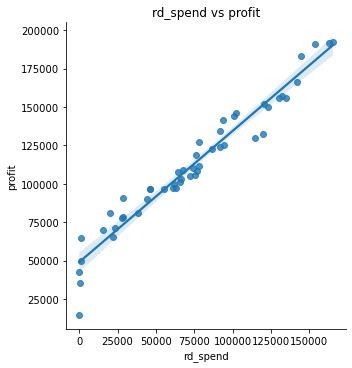

In [14]:
sns.lmplot(x='rd_spend',y='profit',data=startup_data)
plt.title('rd_spend vs profit')
plt.show()

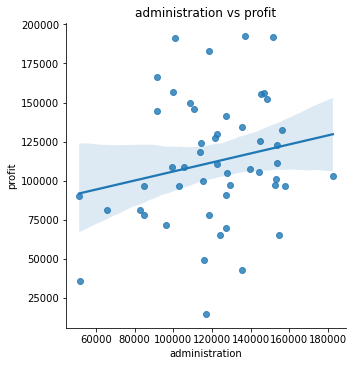

In [15]:
sns.lmplot(x='administration',y='profit',data=startup_data)
plt.title('administration vs profit')
plt.show()

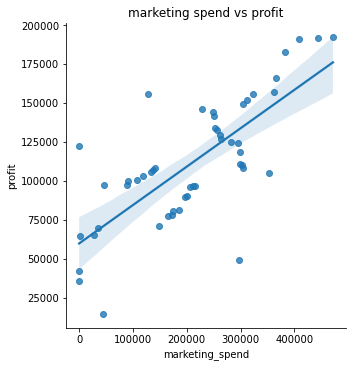

In [16]:
sns.lmplot(x='marketing_spend',y='profit',data=startup_data)
plt.title('marketing spend vs profit')
plt.show()

##### **Linearity Test Failed.**

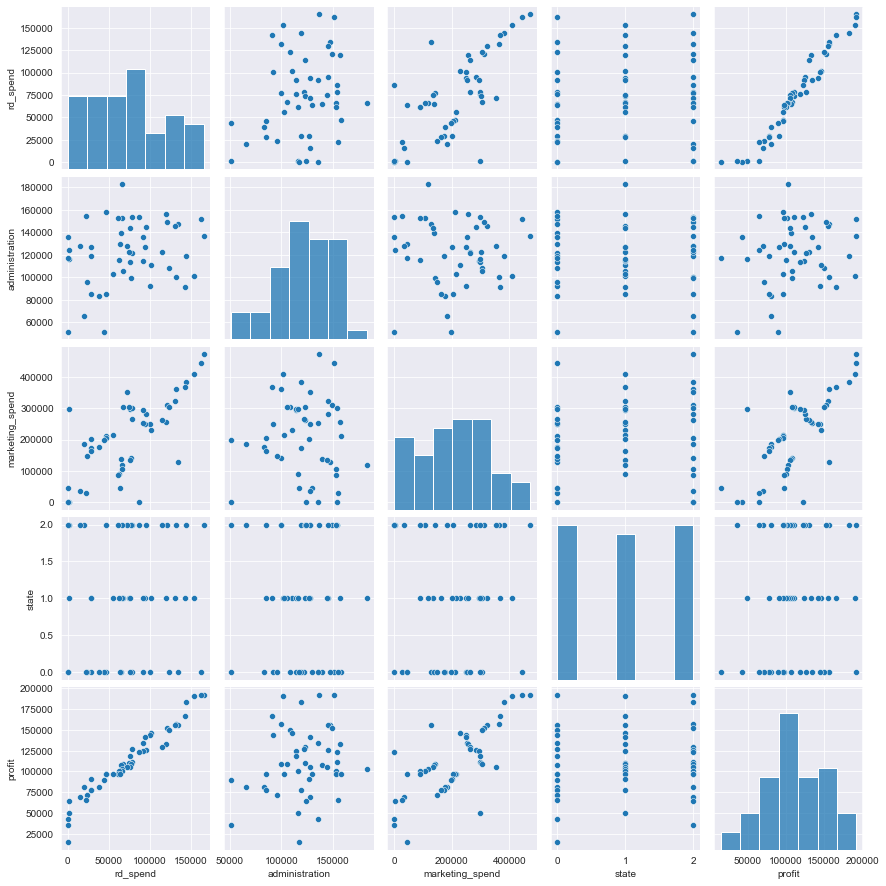

In [17]:
sns.set_style(style='darkgrid')
sns.pairplot(startup_data)

### 3.3.2 Multi-collinearity Test

#### CORRELATION MATRIX

In [18]:
corr_matrix = startup_data.corr()
corr_matrix

,rd_spend,administration,marketing_spend,state,profit
rd_spend,1.000000,0.241955,0.724248,0.104685,0.972900
administration,0.241955,1.000000,-0.032154,0.011847,0.200717
marketing_spend,0.724248,-0.032154,1.000000,0.077670,0.747766
state,0.104685,0.011847,0.077670,1.000000,0.101796
profit,0.972900,0.200717,0.747766,0.101796,1.000000


<AxesSubplot:>

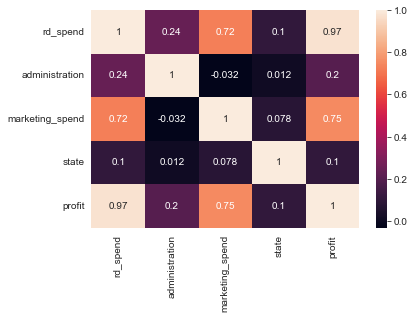

In [19]:
sns.heatmap(corr_matrix,annot=True)

##### rd_spend and profit has stronger positive correlation, which is causing the multicoliinearity in data.

### 3.2.2 Normality Test

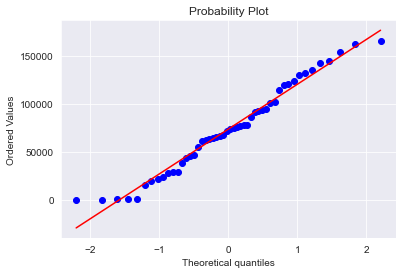

In [20]:
stats.probplot(x=startup_data['rd_spend'],dist='norm',plot=plt)
plt.show()

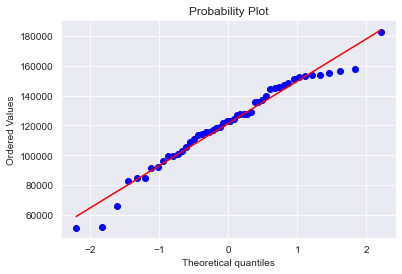

In [21]:
stats.probplot(x=startup_data['administration'],dist='norm',plot=plt)
plt.show()

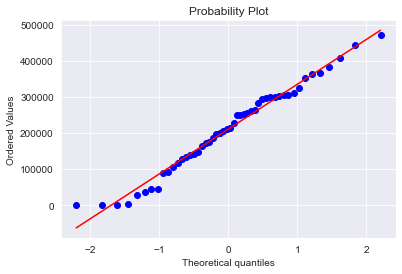

In [22]:
stats.probplot(x=startup_data['marketing_spend'],dist='norm',plot=plt)
plt.show()

##### **Normality Test Failed.**

# Model Building

In [23]:
model = smf.ols(formula='profit~rd_spend+administration+marketing_spend+state',data=startup_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 18 May 2022   Prob (F-statistic):           8.51e-29
Time:                        13:17:42   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
rd_spend            0.8058      0.046     17.609      0.000       0.714       0.898
administration     -0.0268      0.052     -0.520      0.606      -0.131       0.077
marketing_spend     0.0272      0.017      1.637      0.109      -0.006       0.061
state             -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model.params
# The values are of bo, b1, b2, b3, b4

Intercept          50142.506443
rd_spend               0.805760
administration        -0.026826
marketing_spend        0.027228
state                -22.320577
dtype: float64

#### p-Value > 0.05 for administration, marketing spend, state
Thus, Those are insignificant.

## Simple Linear Regression

In [25]:
model1 = model = smf.ols(formula='profit~administration',data=startup_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 18 May 2022   Prob (F-statistic):              0.162
Time:                        13:17:42   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### administration is insignificant variable.

In [26]:
model = smf.ols(formula='profit~marketing_spend',data=startup_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 18 May 2022   Prob (F-statistic):           4.38e-10
Time:                        13:17:42   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
marketing_spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### marketing spend is significant var, so no need to remove this var

In [27]:
model = smf.ols(formula='profit~state',data=startup_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5026
Date:                Wed, 18 May 2022   Prob (F-statistic):              0.482
Time:                        13:17:42   Log-Likelihood:                -600.39
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.071e+05   9005.386     11.891      0.000     8.9e+04    1.25e+05
state       4925.6356   6947.806      0.709      0.482   -9043.865    1.89e+04
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.134
Skew:                           0.047   Prob(JB):                        0.935
Kurtosis:                       2.765   Cond. No.                         2.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### state is insignificant var

In [28]:
model = smf.ols(formula='profit~administration+state',data=startup_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.241
Date:                Wed, 18 May 2022   Prob (F-statistic):              0.298
Time:                        13:17:42   Log-Likelihood:                -599.37
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      47   BIC:                             1210.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.237e+04   2.63e+04      2.752      0.008    1.95e+04    1.25e+05
administration     0.2871      0.205      1.404      0.167      -0.124       0.699
state           4811.2496   6879.140      0.699      0.488   -9027.795    1.87e+04
==============================================================================
Omnibus:                        0.187   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.302
Skew:                           0.132   Prob(JB):                        0.860
Kurtosis:                       2.726   Cond. No.                     5.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
model = smf.ols(formula='profit~administration+marketing_spend',data=startup_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 18 May 2022   Prob (F-statistic):           2.50e-10
Time:                        13:17:42   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
administration      0.3237      0.131      2.468      0.017       0.060       0.588
marketing_spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
model = smf.ols(formula='profit~marketing_spend+state',data=startup_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     30.04
Date:                Wed, 18 May 2022   Prob (F-statistic):           3.95e-09
Time:                        13:17:42   Log-Likelihood:                -580.07
No. Observations:                  50   AIC:                             1166.
Df Residuals:                      47   BIC:                             1172.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.811e+04   8798.042      6.605      0.000    4.04e+04    7.58e+04
marketing_spend     0.2453      0.032      7.679      0.000       0.181       0.310
state            2128.2118   4690.182      0.454      0.652   -7307.217    1.16e+04
==============================================================================
Omnibus:                        4.358   Durbin-Watson:                   1.177
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                3.855
Skew:                          -0.321   Prob(JB):                        0.146
Kurtosis:                       4.200   Cond. No.                     5.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## state is causing the issue

In [31]:
a = smf.ols(formula='profit~rd_spend+marketing_spend+state',data=startup_data).fit().rsquared
b = smf.ols(formula='profit~rd_spend+administration+state',data=startup_data).fit().rsquared
c = smf.ols(formula='profit~rd_spend+administration+marketing_spend',data=startup_data).fit().rsquared

vif_ad = 1/(1-a)
vif_ms = 1/(1-b)
vif_state = 1/(1-c)

vif_table = pd.DataFrame({'VAriable':['ad','ms','state'],'VIF':[vif_ad,vif_ms,vif_state]})
vif_table

,VAriable,VIF
0,ad,20.181777
1,ms,19.161949
2,state,20.302917


### state is having higher VIF.
SO let us remove the state column.

In [32]:
startup_data.head()

,rd_spend,administration,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [38]:
final_model = smf.ols(formula='profit~rd_spend+administration+marketing_spend',data=startup_data).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 18 May 2022   Prob (F-statistic):           4.53e-30
Time:                        13:36:57   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rd_spend            0.8057      0.045     17.846      0.000       0.715       0.897
administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# now, administartion and marketing speed are causing the problem.

In [39]:
final_model1 = smf.ols(formula='profit~administration',data=startup_data).fit()
final_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 18 May 2022   Prob (F-statistic):              0.162
Time:                        13:36:58   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
final_model2 = smf.ols(formula='profit~marketing_spend',data=startup_data).fit()
final_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 18 May 2022   Prob (F-statistic):           4.38e-10
Time:                        13:36:58   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
marketing_spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
final_model = smf.ols(formula='profit~administration+marketing_spend',data=startup_data).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 18 May 2022   Prob (F-statistic):           2.50e-10
Time:                        13:36:59   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
administration      0.3237      0.131      2.468      0.017       0.060       0.588
marketing_spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

as, pvalue for final_model1 is 0.162 >0.05 
hence administration is needed to check for outliers.

<AxesSubplot:xlabel='administration', ylabel='profit'>

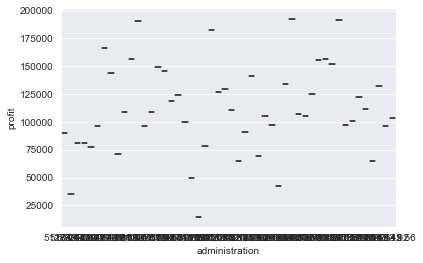

In [42]:
sns.boxplot(x='administration',y='profit',data=startup_data,)

<AxesSubplot:xlabel='administration'>

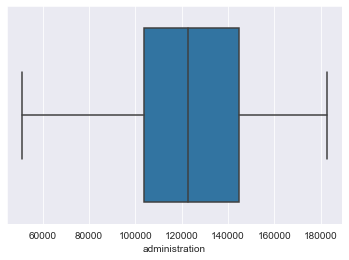

In [43]:
sns.boxplot(startup_data['administration'])

<AxesSubplot:xlabel='profit'>

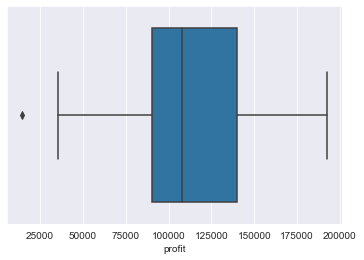

In [44]:
sns.boxplot(startup_data['profit'])

In [45]:
# There is 1 outlier in profit variable.

# Outlier Detection and removal of outlier in profit

In [46]:
# IQR detection
q1 = np.percentile(startup_data['profit'],q=25)
q3 = np.percentile(startup_data['profit'],75)
iqr = q3 - q1

In [47]:
#upper and lower bound
#upper = np.where(startup_data['profit'] >= (q3+1.5*iqr))
lower = np.where(startup_data['profit'] <= (q1-1.5*iqr))

In [48]:
startup_data.shape

(50, 4)

In [49]:
#removing the outliers
#startup_data.drop(upper[0],inplace=True)
startup_data.drop(lower[0],inplace=True)

In [50]:
startup_data.shape

(49, 4)

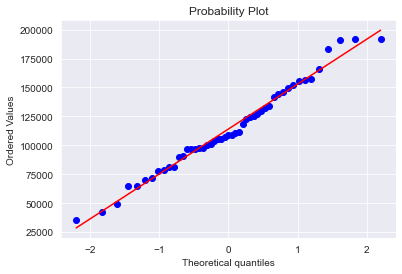

In [51]:
stats.probplot(x=startup_data['profit'],plot=plt)
plt.show()

In [52]:
startup_data.head()

,rd_spend,administration,marketing_spend,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [53]:
final_selected_model = smf.ols(formula='profit~rd_spend+administration+marketing_spend',data=startup_data).fit()
final_selected_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 18 May 2022   Prob (F-statistic):           8.85e-32
Time:                        13:37:15   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rd_spend            0.7830      0.038     20.470      0.000       0.706       0.860
administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
marketing_spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Assumptions check for final_selected model

In [55]:
error = startup_data['profit'] - final_selected_model.predict(startup_data)

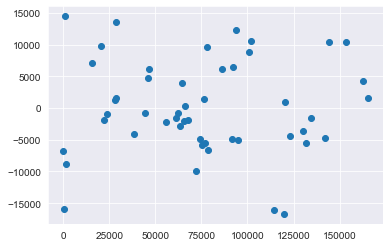

In [56]:
plt.scatter(x=startup_data['rd_spend'],y = error)

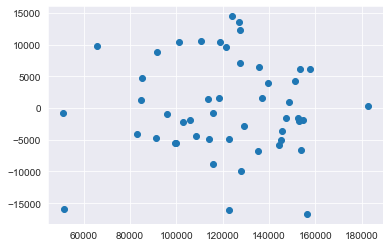

In [57]:
plt.scatter(x=startup_data['administration'],y = error)

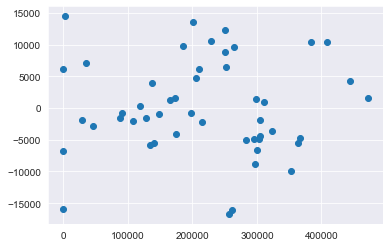

In [58]:
plt.scatter(x=startup_data['marketing_spend'],y = error)

Text(0.5, 1.0, 'Actual output vs predicted output')

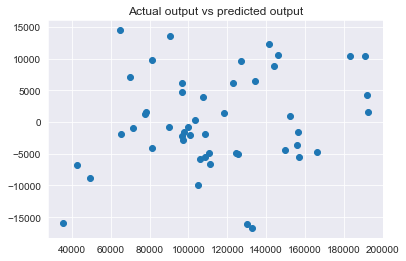

In [59]:
plt.scatter(x=startup_data['profit'],y=error)
plt.title('Actual output vs predicted output')

# -------------------------------------------------------------

In [60]:
X = startup_data.drop(['profit'],axis=1)
y = startup_data[['profit']]

In [61]:
X.head()

,rd_spend,administration,marketing_spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [62]:
X.shape,y.shape

((49, 3), (49, 1))

In [63]:
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled,columns=X.columns)
X_scaled.head()

,rd_spend,administration,marketing_spend
0,2.018325,0.552080,2.146120
1,1.956704,1.069017,1.913596
2,1.751650,-0.724297,1.613709
3,1.548545,-0.098597,1.407457
4,1.497818,-1.072513,1.265442


In [64]:
# Before scaling
X.mean(),X.std()

(rd_spend            75226.138367
 administration     121433.636327
 marketing_spend    214409.833265
 dtype: float64,
 rd_spend            45115.141560
 administration      28301.008988
 marketing_spend    121168.170072
 dtype: float64)

In [65]:
# After scaling
X_scaled.mean(),X_scaled.std()

(rd_spend           5.437827e-17
 administration    -5.347197e-16
 marketing_spend   -1.178196e-16
 dtype: float64,
 rd_spend           1.010363
 administration     1.010363
 marketing_spend    1.010363
 dtype: float64)

## Model Training

In [66]:
linear_model = LinearRegression()

In [67]:
linear_model.fit(X_scaled,y)
print('coefficient is \n',linear_model.coef_)
print('intercept is \n',linear_model.intercept_)

coefficient is 
 [[34962.92051595  -621.8765653   3026.15220326]]
intercept is 
 [113998.99102041]


## Model Testing

In [68]:
y_pred = linear_model.predict(X_scaled)

In [69]:
error = y - y_pred
error.head()

,profit
0,1545.153001
1,4254.937773
2,10474.863604
3,10440.845358
4,-4675.546721


# Homoscedasticity Check

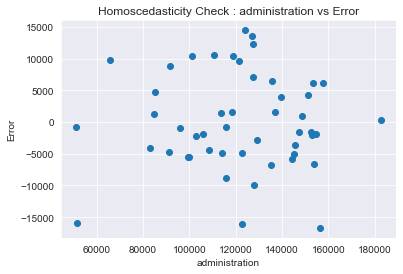

In [70]:
plt.scatter(x=startup_data['administration'],y=error)
plt.title('Homoscedasticity Check : administration vs Error')
plt.xlabel('administration')
plt.ylabel('Error')
plt.show()

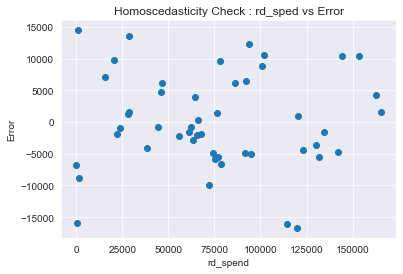

In [71]:
plt.scatter(x=startup_data['rd_spend'],y=error)
plt.title('Homoscedasticity Check : rd_sped vs Error')
plt.xlabel('rd_spend')
plt.ylabel('Error')
plt.show()

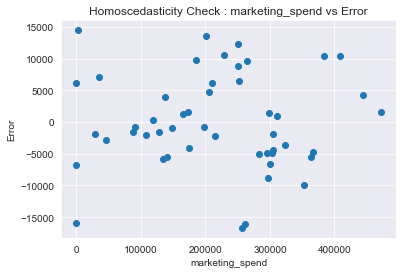

In [72]:
plt.scatter(x=startup_data['marketing_spend'],y=error)
plt.title('Homoscedasticity Check : marketing_spend vs Error')
plt.xlabel('marketing_spend')
plt.ylabel('Error')
plt.show()

## Zero Residual Mean Test

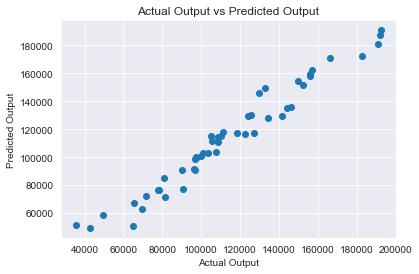

In [73]:
plt.scatter(x=y,y=y_pred)
plt.title('Actual Output vs Predicted Output')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

In [74]:
linear_model.score(X,y)

-9545835116.249603

## Model building using sklearn

In [75]:
X = startup_data.drop(['profit'],axis=1)
y = startup_data[['profit']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((39, 3), (10, 3), (39, 1), (10, 1))

In [76]:
req_model = LinearRegression()
req_model = req_model.fit(X_train,y_train)
y_predict = req_model.predict(X_test)

# Model Evaluation

In [77]:
print('Mean Absolute Error    :', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error     :', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))
print("R^2 Score              :", r2_score(y_test, y_predict))

Mean Absolute Error    : 6464.492619163817
Mean Squared Error     : 63100621.47713737
Root Mean Squared Error: 7943.58996154367
R^2 Score              : 0.9222294748377121


# log transformed model

In [78]:
#X = startup_data.drop(['profit'],axis=1)
y = startup_data[['profit']]
X_log = np.log(X)

In [79]:
y.head()

,profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [80]:
result = pd.concat([X_log,y], axis=1, join='inner')
display(result)

,rd_spend,administration,marketing_spend,profit
0,12.015815,11.826990,13.064277,192261.83
1,11.999034,11.927533,13.003351,191792.06
2,11.941075,11.524316,12.918862,191050.39
3,11.880151,11.684117,12.856311,182901.99
4,11.864338,11.422911,12.810849,166187.94
5,11.789624,11.511071,12.801776,156991.12
6,11.810178,11.899540,11.757571,156122.51
7,11.777580,11.888138,12.688118,155752.60
8,11.699758,11.909814,12.649518,152211.77
9,11.722659,11.596155,12.628007,149759.96


In [81]:
result.isna().sum()

rd_spend           0
administration     0
marketing_spend    0
profit             0
dtype: int64

In [82]:
result_data = result.dropna()

In [83]:
result_data.shape

(49, 4)

In [84]:
X_log = result_data.drop(['profit'],axis=1)
y_log = result_data[['profit']]

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X_log,y_log,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((39, 3), (10, 3), (39, 1), (10, 1))

In [86]:
X_log.head()

,rd_spend,administration,marketing_spend
0,12.015815,11.826990,13.064277
1,11.999034,11.927533,13.003351
2,11.941075,11.524316,12.918862
3,11.880151,11.684117,12.856311
4,11.864338,11.422911,12.810849


In [87]:
y_log.head()

,profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [88]:
req_model_1 = LinearRegression()
req_model_1 = req_model_1.fit(X_train,y_train)
y_predict_1 = req_model_1.predict(X_test)
print('Mean Absolute Error    :', mean_absolute_error(y_test, y_predict_1))  
print('Mean Squared Error     :', mean_squared_error(y_test, y_predict_1))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict_1)))
print("R^2 Score              :", r2_score(y_test, y_predict_1))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### log(administration)

In [89]:
X = startup_data.drop(['profit'],axis=1)
y = startup_data[['profit']]
X.head()

,rd_spend,administration,marketing_spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [90]:
X['administration']=np.log(X['administration'])
X.head()

,rd_spend,administration,marketing_spend
0,165349.20,11.826990,471784.10
1,162597.70,11.927533,443898.53
2,153441.51,11.524316,407934.54
3,144372.41,11.684117,383199.62
4,142107.34,11.422911,366168.42


In [91]:
X_ad_log = X

In [92]:
result = pd.concat([X_ad_log,y], axis=1, join='inner')
display(result)

,rd_spend,administration,marketing_spend,profit
0,165349.20,11.826990,471784.10,192261.83
1,162597.70,11.927533,443898.53,191792.06
2,153441.51,11.524316,407934.54,191050.39
3,144372.41,11.684117,383199.62,182901.99
4,142107.34,11.422911,366168.42,166187.94
5,131876.90,11.511071,362861.36,156991.12
6,134615.46,11.899540,127716.82,156122.51
7,130298.13,11.888138,323876.68,155752.60
8,120542.52,11.909814,311613.29,152211.77
9,123334.88,11.596155,304981.62,149759.96


In [93]:
result.isna().sum()

rd_spend           0
administration     0
marketing_spend    0
profit             0
dtype: int64

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X_ad_log,y,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((39, 3), (10, 3), (39, 1), (10, 1))

In [95]:
req_model_2 = LinearRegression()
req_model_2 = req_model_2.fit(X_train,y_train)
y_predict_2 = req_model_2.predict(X_test)
print('Mean Absolute Error    :', mean_absolute_error(y_test, y_predict_2))  
print('Mean Squared Error     :', mean_squared_error(y_test, y_predict_2))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict_2)))
print("R^2 Score              :", r2_score(y_test, y_predict_2))

Mean Absolute Error    : 6579.60961570201
Mean Squared Error     : 63156471.003107235
Root Mean Squared Error: 7947.104567268964
R^2 Score              : 0.9221606411739055


### log(marketing)

In [96]:
#X = startup_data.drop(['profit'],axis=1)
y = startup_data[['profit']]
X['marketing_spend']=np.log(X['marketing_spend'])
X.head()
result = pd.concat([X,y], axis=1, join='inner')
display(result)

,rd_spend,administration,marketing_spend,profit
0,165349.20,11.826990,13.064277,192261.83
1,162597.70,11.927533,13.003351,191792.06
2,153441.51,11.524316,12.918862,191050.39
3,144372.41,11.684117,12.856311,182901.99
4,142107.34,11.422911,12.810849,166187.94
5,131876.90,11.511071,12.801776,156991.12
6,134615.46,11.899540,11.757571,156122.51
7,130298.13,11.888138,12.688118,155752.60
8,120542.52,11.909814,12.649518,152211.77
9,123334.88,11.596155,12.628007,149759.96


In [97]:
result.isna().sum()

rd_spend           0
administration     0
marketing_spend    0
profit             0
dtype: int64

In [98]:
result_data = result.dropna()

In [99]:
result_data.shape

(49, 4)

In [100]:
X_log = result_data.drop(['profit'],axis=1)
y_log = result_data[['profit']]

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X_log,y_log,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((39, 3), (10, 3), (39, 1), (10, 1))

In [102]:
req_model_3 = LinearRegression()
req_model_3 = req_model_3.fit(X_train,y_train)
y_predict_3 = req_model_3.predict(X_test)
print('Mean Absolute Error    :', mean_absolute_error(y_test, y_predict_3))  
print('Mean Squared Error     :', mean_squared_error(y_test, y_predict_3))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict_3)))
print("R^2 Score              :", r2_score(y_test, y_predict_3))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### log(rd_spend)

In [103]:
#X = startup_data.drop(['profit'],axis=1)
y = startup_data[['profit']]
X['rd_spend']=np.log(X['rd_spend'])
X.head()
result = pd.concat([X,y], axis=1, join='inner')
display(result)

,rd_spend,administration,marketing_spend,profit
0,12.015815,11.826990,13.064277,192261.83
1,11.999034,11.927533,13.003351,191792.06
2,11.941075,11.524316,12.918862,191050.39
3,11.880151,11.684117,12.856311,182901.99
4,11.864338,11.422911,12.810849,166187.94
5,11.789624,11.511071,12.801776,156991.12
6,11.810178,11.899540,11.757571,156122.51
7,11.777580,11.888138,12.688118,155752.60
8,11.699758,11.909814,12.649518,152211.77
9,11.722659,11.596155,12.628007,149759.96


In [104]:
result.isna().sum()

rd_spend           0
administration     0
marketing_spend    0
profit             0
dtype: int64

In [105]:
result_data = result.dropna()
result_data.shape
# There was 1 -inf value, but it was already removed while removing nan value

(49, 4)

In [106]:
X_log = result_data.drop(['profit'],axis=1)
y_log = result_data[['profit']]
X_train,X_test,y_train,y_test = train_test_split(X_log,y_log,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((39, 3), (10, 3), (39, 1), (10, 1))

In [107]:
req_model_4 = LinearRegression().fit(X_train,y_train)
y_predict_4 = req_model_4.predict(X_test)
print('Mean Absolute Error    :', mean_absolute_error(y_test, y_predict_4))  
print('Mean Squared Error     :', mean_squared_error(y_test, y_predict_4))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict_4)))
print("R^2 Score              :", r2_score(y_test, y_predict_4))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## square root transformation

In [108]:
#X = startup_data.drop(['profit'],axis=1)
y = startup_data[['profit']]
X_square_root = np.sqrt(X)

In [109]:
result = pd.concat([X_square_root,y], axis=1, join='inner')
display(result)

,rd_spend,administration,marketing_spend,profit
0,3.466384,3.439039,3.614454,192261.83
1,3.463962,3.453626,3.606016,191792.06
2,3.455586,3.394748,3.594282,191050.39
3,3.446760,3.418204,3.585570,182901.99
4,3.444465,3.379780,3.579225,166187.94
5,3.433602,3.392797,3.577957,156991.12
6,3.436594,3.449571,3.428931,156122.51
7,3.431848,3.447918,3.562038,155752.60
8,3.420491,3.451060,3.556616,152211.77
9,3.423837,3.405313,3.553591,149759.96


In [110]:
result.isna().sum()

rd_spend           1
administration     0
marketing_spend    3
profit             0
dtype: int64

In [111]:
X_sqrt = result_data.drop(['profit'],axis=1)
y = result_data[['profit']]

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X_sqrt,y,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((39, 3), (10, 3), (39, 1), (10, 1))

In [113]:
req_model_7 = LinearRegression().fit(X_train,y_train)
y_predict_7 = req_model_7.predict(X_test)
print('Mean Absolute Error    :', mean_absolute_error(y_test, y_predict_7))  
print('Mean Squared Error     :', mean_squared_error(y_test, y_predict_7))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict_7)))
print("R^2 Score              :", r2_score(y_test, y_predict_7))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# The best MODEL
## final_selected_model :---> I/p variables are R&D Spend and Administration and Marketing Spend ..........its p value is 0.961 

## linear_model is also the best model we can choose, even it is satisfying(not wholly) the homoscedasticity test.